In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [57]:
from beliefPropagation import performBeliefPropagation

In [58]:
code = "[[72, 12, 6]]"

matrix = np.load(f"codes/{code}.npz")
n = 72
k = 12

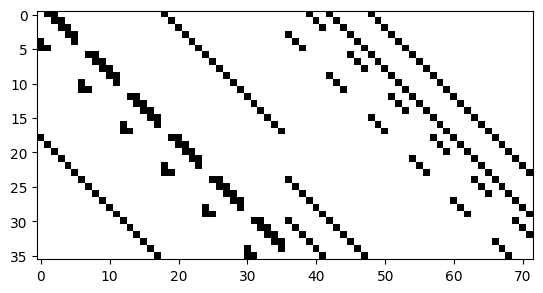

In [59]:
Hx = matrix["Hx"]
plt.imshow(Hx, cmap='Greys', interpolation='nearest')

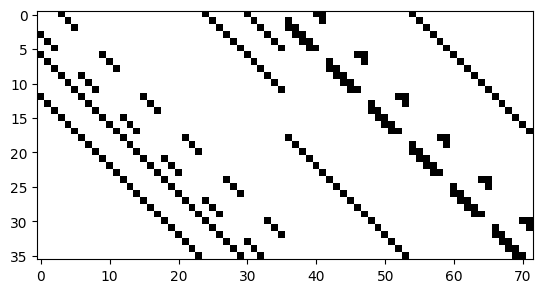

In [60]:
Hz = matrix['Hz']
plt.imshow(Hz, cmap="Greys", interpolation="nearest")

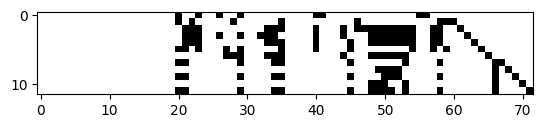

In [61]:
Lx = matrix['Lx']
plt.imshow(Lx, cmap="Greys", interpolation="nearest")

In [62]:
print(Hx.shape)
print(Lx.shape)

(36, 72)
(12, 72)


In [63]:
errorRate = 0.05

In [64]:
# set numpy random seed
np.random.seed(0)

In [65]:
error = (np.random.rand(n) < errorRate).astype(int)
print(error)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [66]:
print(error.reshape(1, -1)) # this is just for plt, since it wants a matrix

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


([], [])

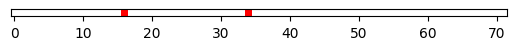

In [67]:
cmap = ListedColormap(['white', 'red'])
plt.imshow(error.reshape(1, -1), cmap=cmap, interpolation="nearest")
plt.yticks([])

In [68]:
initialBeliefs = [np.log((1 - errorRate) / errorRate)] * n
print(initialBeliefs)

[np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.floa

([], [])

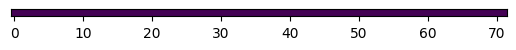

In [69]:
plt.imshow(np.asarray(initialBeliefs).reshape(1, -1), interpolation='nearest')
plt.yticks([])

In [70]:
detection, isSyndromeFound, lastBeliefs = performBeliefPropagation(Hx, error, initialBeliefs)

Initial syndrome: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
Error found at iteration 0: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(4.301275079985464), np.float64(7.014947281623513), np.float64(4.301275079985464), np.float64(1.587602878347416), np.float64(-1.1260693232906327), np.float64(1.587602878347416), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(7.014947281623513), np.float64(

In [71]:
print(detection, isSyndromeFound)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] True


([], [])

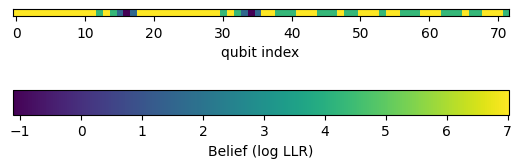

In [72]:
im = plt.imshow(np.asarray(lastBeliefs).reshape(1, -1), interpolation='nearest')
cbar = plt.colorbar(im, orientation='horizontal', pad=0.2)
cbar.set_label('Belief (log LLR)')
plt.xlabel('qubit index')
plt.yticks([])